In [4]:
!pip install wfdb
!pip install PyWavelets
!pip install spt
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/
# 利用wget完成数据下载

--2024-05-07 11:18:08--  https://physionet.org/files/mitdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.13.52.205
Connecting to physionet.org (physionet.org)|18.13.52.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/mitdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  22.86K  --.-KB/s    in 0.02s   

Last-modified header missing -- time-stamps turned off.
2024-05-07 11:18:09 (1.08 MB/s) - ‘physionet.org/files/mitdb/1.0.0/index.html’ saved [23410]

Loading robots.txt; please ignore errors.
--2024-05-07 11:18:09--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2024-05-07 11:18:09--  https://physionet.org/files/mitdb/1.0.0/mitdbdir/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 304 Not Modifie

In [2]:
# 导入库
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
import pywt
import pandas as pd

In [6]:
set_roman_plot_params()
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

record = wfdb.rdrecord('./physionet.org/files/mitdb/1.0.0/109', # 文件所在路径
                       sampfrom=0, # 读取100这个记录的起点，从第0个点开始读
                       sampto=4000, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
# 小波去噪
def denoise(data):
    # 小波变换
    coeffs = pywt.wavedec(data=data, wavelet='db5', level=8)
    cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

    # 阈值去噪
    threshold = (np.median(np.abs(cD1)) / 0.6745) * (np.sqrt(2 * np.log(len(cD1))))
    cD1.fill(0)
    cD2.fill(0)
    for i in range(1, len(coeffs) - 2):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # 小波反变换,获取去噪后的信号
    rdata = pywt.waverec(coeffs=coeffs, wavelet='db5')
    return rdata
# 转为数字信号
signal = record.d_signal[0:1000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
# amplitude.to_csv('V_ecg.csv')  #未去噪的V类ECG数据
# plt.plot(amplitude)
# plt.show()

# signal = denoise(signal)



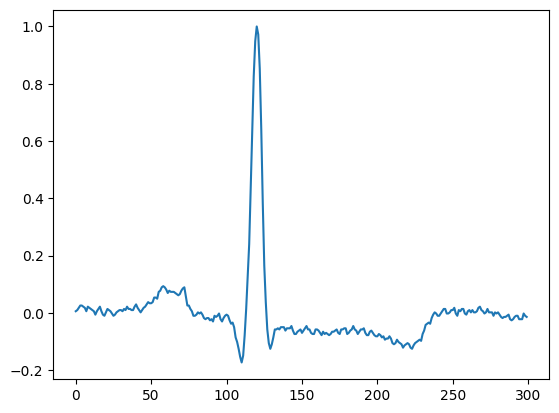

['N']


In [20]:
# 获取心拍，并分类

url= './physionet.org/files/mitdb/1.0.0/100'
sampfrom=250
sampto=550
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=sampfrom, # 读取100这个记录的起点，从第0个点开始读
                       sampto=sampto, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:1000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('N_ecg.csv')  #未去噪的V类ECG数据

plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=sampfrom, sampto=sampto)
# 将读取到的annatations的心拍绘制到心电图上

print(signal_ann.symbol)



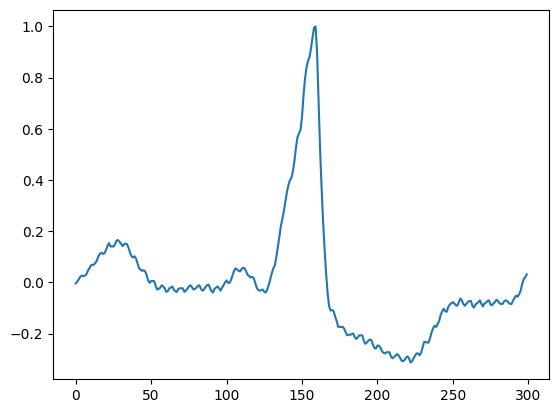

['F']


In [15]:
# 找出F类心拍
url= './physionet.org/files/mitdb/1.0.0/208'
sampfrom=540
sampto=840
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=sampfrom, # 读取100这个记录的起点，从第0个点开始读
                       sampto=sampto, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:4000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('F_ecg.csv')  #未去噪的V类ECG数据

plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=sampfrom, sampto=sampto)
# 将读取到的annatations的心拍绘制到心电图上

print(signal_ann.symbol)

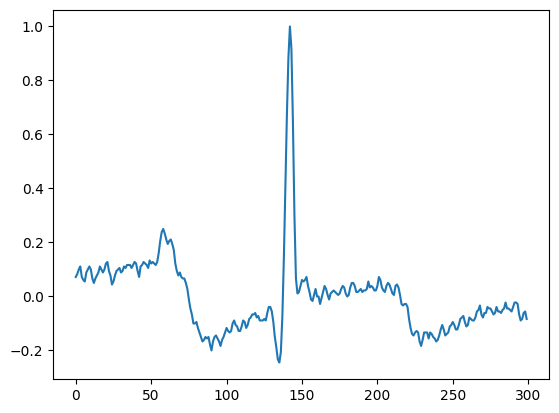

['j']


In [47]:
# 找出S心拍
url= './physionet.org/files/mitdb/1.0.0/222'
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=403800, # 读取100这个记录的起点，从第0个点开始读
                       sampto=404100, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:8000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('S_ecg.csv')  #未去噪的V类ECG数据
plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=403500, sampto=403800)
                      

print(signal_ann.symbol)


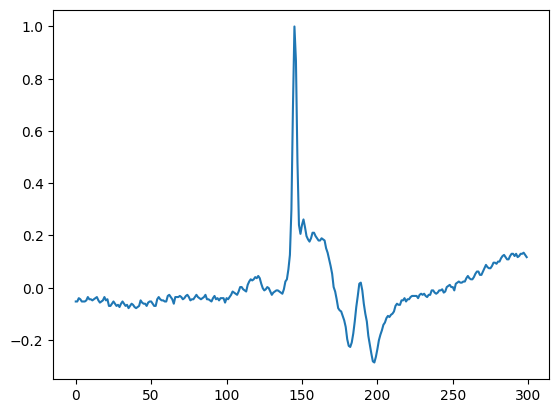

['f']


In [7]:
# 找出Q心拍
url= './physionet.org/files/mitdb/1.0.0/104'
sampfrom=3650 
sampto=3950
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=sampfrom, # 读取100这个记录的起点，从第0个点开始读
                       sampto=sampto, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:8000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('Q_ecg.csv')  #未去噪的V类ECG数据

plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=sampfrom, sampto=sampto)
                        

print(signal_ann.symbol)

In [36]:
import os
import wfdb

url='./physionet.org/files/mitdb/1.0.0/'
# Change directory to the desired folder

# Initialize an empty list to store the filenames
filenames = []

# Loop through all files in the directory
for filename in os.listdir(url):
    # Check if the file ends with '.atr'
    if filename.endswith('.atr'):
        # Extract the filename without extension
        base_filename = os.path.splitext(filename)[0]

        # Read the annotation file
        annotation = wfdb.rdann(os.path.join(url,base_filename), 'atr')

        # Check if the annotation contains symbols 'A', 'J', 'S', or 'a'
        if any(symbol in ['P', 'U', 'f'] for symbol in annotation.symbol):
            # Add the filename to the list
            filenames.append(base_filename)

# Print the list of filenames
print(filenames)


os.getcwd()

['217', '104', '102-0', '102']


'/workspaces/ECG-database'

/workspaces/ECG-database
